## 1、机器学习损失函数概念
在机器学习中，损失函数是代价函数的一部分，而代价函数则是目标函数的一种类型。

**Loss function**，即损失函数：用于定义单个训练样本与真实值之间的误差；

**Cost function**，即代价函数：用于定义单个批次/整个训练集样本与真实值之间的误差；

**Objective function**，即目标函数：泛指任意可以被优化的函数。

## 2、回归损失（Regression Loss）
### 2.1 均方差损失 Mean Squared Error Loss
均方差 Mean Squared Error (MSE)损失是机器学习、深度学习回归任务中最常用的一种损失函数，也称为 L2 Loss。其基本形式如下：
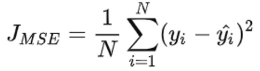

从直觉上理解均方差损失，这个损失函数的最小值为 0（当预测等于真实值时），最大值为无穷大。下图是对于真实值
y=0，不同的预测值[−1.5,1.5]的均方差损失的变化图。横轴是不同的预测值，纵轴是均方差损失，可以看到随着预测与真实值绝对误差$|y - \hat y|$的增加，均方差损失呈二次方地增加。
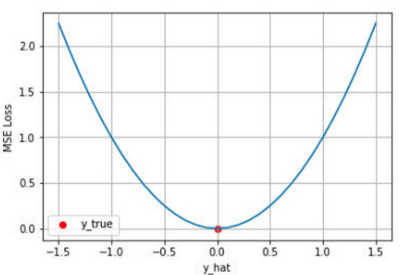

假设**模型预测与真实值之间的误差服从标准高斯分布$(\mu =0,\sigma=1)$**，则给定一个$x_i$模型输出真实值$y_i$模型输出真实值的概率为:
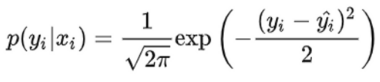

进一步我们假设数据集中 N 个样本点之间相互独立，则给定所有$x$输出所有真实值的概率，即似然 Likelihood，为所有
$P(y_i|x_i)$的累乘：
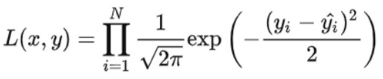

通常为了计算方便，我们通常最大化对数似然 Log-Likelihood:
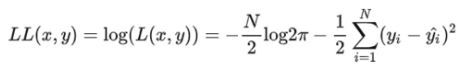

可以看到这个实际上就是均方差损失的形式。也就是说在模型输出与真实值的误差服从高斯分布的假设下，最小化均方差损失函数与极大似然估计本质上是一致的

### 2.2、平均绝对误差损失 Mean Absolute Error Loss
平均绝对误差 Mean Absolute Error (MAE)是另一类常用的损失函数，也称为 L1 Loss。其基本形式如下：
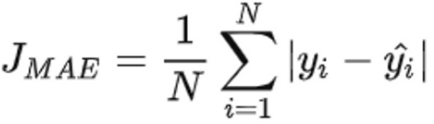

同样的我们可以对这个损失函数进行可视化如下图，MAE 损失的最小值为 0（当预测等于真实值时），最大值为无穷大。可以看到随着预测与真实值绝对误差$|y - \hat y|$的增加，MAE 损失呈线性增长：
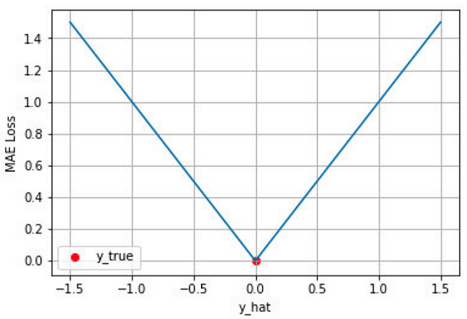

MAE 假设模型预测与真实值之间的误差服从拉普拉斯分布 Laplace distribution$(\mu=0,b=1)$，则给定一个 $x_i$ 模型输出真实值 $y_i$的概率为：
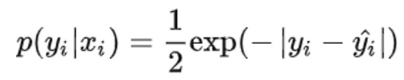

与上面推导 MSE 时类似，我们可以得到的负对数似然实际上就是 MAE 损失的形式
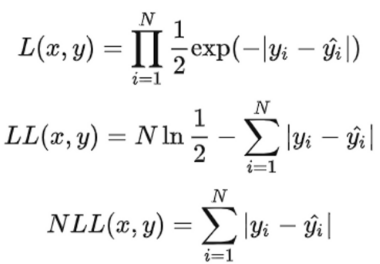

#### MAE 与 MSE 区别
- **MSE 通常比 MAE 可以更快地收敛**
- **MAE 对于 outlier 更加 robust**

### 2.3、Huber Loss
Huber Loss则是一种将 MSE 与 MAE 结合起来，取两者优点的损失函数，也被称作 Smooth Mean Absolute Error Loss 。其原理很简单，就是在误差接近 0 时使用 MSE，误差较大时使用 MAE，公式为：
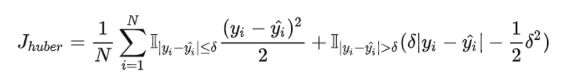

上式中$\delta$是 Huber Loss 的一个超参数,$\delta$的值是 MSE 和 MAE 两个损失连接的位置。上式等号右边第一项是 MSE 的部分，第二项是 MAE 部分，在 MAE 的部分公式为 $\delta|y_i - \hat y|-\frac{1}{2} \delta^2$是为了保证误差$|y-\hat y| = \pm \delta$时 MAE 和 MSE 的取值一致，进而保证 Huber Loss 损失连续可导。

下图$\delta=1.0$时的 Huber Loss,可以看到在$[-\delta,\delta]$的区间内实际上就是 MSE 损失，在(−∞,$\delta$)和($\delta$,∞)区间内为 MAE损失.
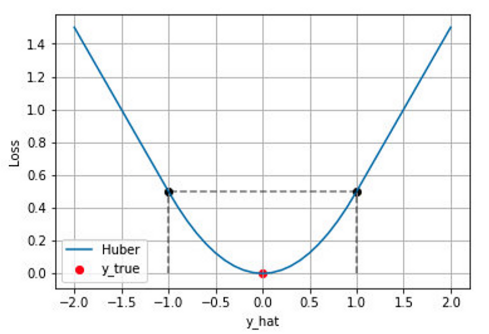

### Huber Loss 的特点
- 1、Huber Loss 结合了 MSE 和 MAE 损失，在误差接近 0 时使用 MSE，使损失函数可导并且梯度更加稳定；

- 2、在误差较大时使用 MAE 可以降低 outlier 的影响，使训练对 outlier 更加健壮。

- 3、缺点是需要额外地设置一个$\delta$超参数。

## 3、分类损失函数
### 3.1、hinge loss
首先我们已知SVM软间隔的目标函数为：
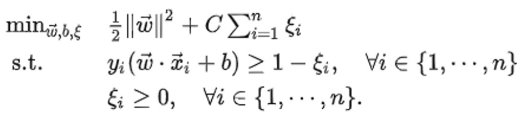

其中：

$\xi_i$是松弛系数，$\xi_i$越大，可以认为模型犯错越严重，$\xi_i$其大小等价于样本i被误分类时，偏离正确的硬边界的**程度**

$C$是一个超参数，用来控制惩罚力度。$C$越大时，越不允许模型犯错。当$C$趋于无穷时，软间隔SVM等价于硬间隔SVM。

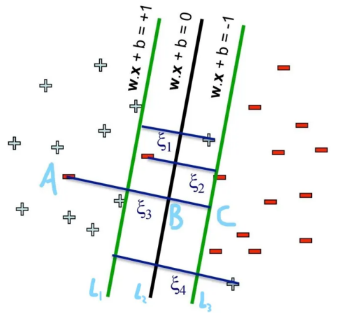

根据约束条件我们有：$\xi \ge 1-y_i(\vec w \bullet \vec x + b)$。那么当ξi最小化时，该约束应取等号。但又因为对任意i都应有，ξi≥0，

因此原问题等价于：
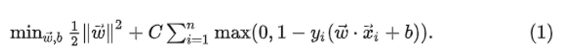

我们令$l(y_i,f(\vec x_i;\vec w,b))=max(0,1-y_if(\vec x;\vec w,b))$，这样我们就得到了著名的Hinge Loss。那么，式(1)

等价于：
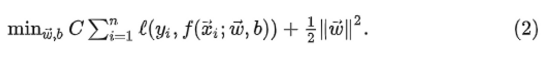

它事实上是一个利用Hinge Loss的ERM，加上了一个L2正则项。如果上式ℓ取Logistic Loss的话，其实就等价于带正则项的Logistic Regression。函数图像如图：
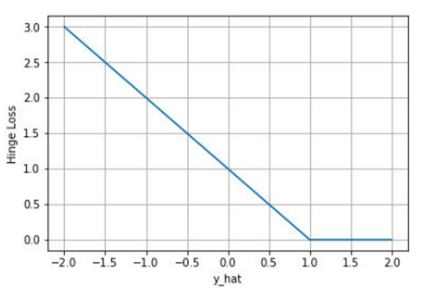

### 3.2、交叉熵损失 Cross Entropy Loss（Softmax交叉熵）
对于分类问题，最常用的损失函数是交叉熵损失函数 Cross Entropy Loss。

#### 二分类
在二分类中我们通常使用 Sigmoid函数将模型的输出压缩到 (0, 1) 区间内 yi^∈(0,1)，用来代表给定输入$x_i$，模型判断为正类的概率。由于只有正负两类，因此同时也得到了负类的概率。
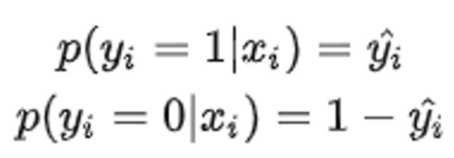
将两条式子合并成一条:
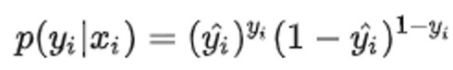
假设数据点之间独立同分布，则似然可以表示为:
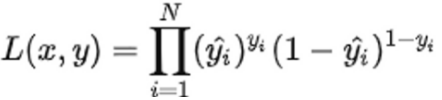
对似然取对数，然后加负号变成最小化负对数似然，即为交叉熵损失函数的形式:
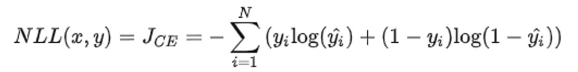

下图是对二分类的交叉熵损失函数的可视化，蓝线是目标值为 0 时输出不同输出的损失，黄线是目标值为 1 时的损失。可以看到约接近目标值损失越小，随着误差变差，损失呈指数增长。
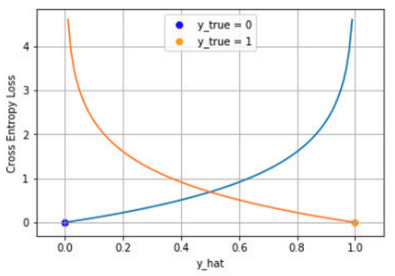

#### 多分类
在多分类的任务中，交叉熵损失函数的推导思路和二分类是一样的，变化的地方是真实值 $y_i$现在是一个 One-hot 向量，同时模型输出的压缩由原来的Sigmoid函数换成Softmax函数：
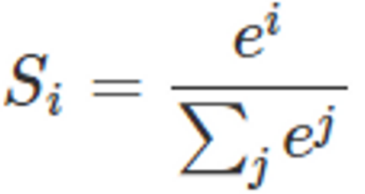
Softmax 函数将每个维度的输出范围都限定在 (0,1)之间，同时所有维度的输出和为 1，用于表示一个概率分布。
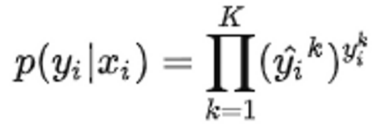
其中 k∈K表示 K 个类别中的一类，同样的假设数据点之间独立同分布，可得到负对数似然为：
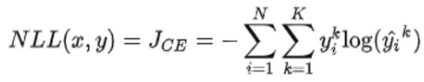
由于$y_i$是一个 one-hot 向量，除了目标类为 1 之外其他类别上的输出都为 0，因此上式也可以写为：
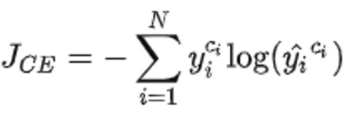
其中 ci是样本 xi的目标类，这个就是应用于多分类的交叉熵损失函数 Softmax Loss 

### 3.3、KL散度
K-L Divergence即KL散度，假设对于样本$x_i$存在一个最优分布 $y_i^*$真实地表明了这个样本属于各个类别的概率，那么我们希望模型的输出 $\hat y_i$尽可能地逼近这个最优分布，在信息论中，我们可以使用 KL 散度来衡量两个分布的相似性。给定分布p和分布q，两者的 KL 散度公式如下:
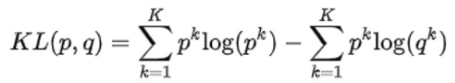

其中第一项为分布p的信息熵，第二项为分布p和q的交叉熵。将最优分布$y_i^*$和输出分布$\hat y_i$带入p和q得到：
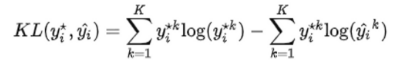

由于我们希望两个分布尽量相近，因此我们最小化 KL 散度。同时由于上式第一项信息熵仅与最优分布本身相关，因此我们在最小化的过程中可以忽略掉，变成最小化:
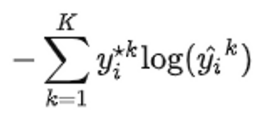
我们并不知道最优分布$y_i^*$，但训练数据里面的目标值$y_i$可以看做是$y_i^*$的一个近似分布：
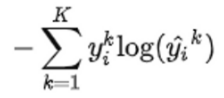
这个是针对单个训练样本的损失函数，如果考虑整个数据集，则:
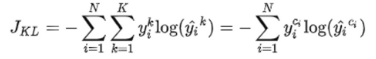
可以看到通过最小化交叉熵的角度推导出来的结果和使用最大 化似然得到的结果是一致的。